In [619]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [946]:
df = pd.read_excel('Data_Train.xlsx')
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [948]:
df.shape

(10683, 11)

In [950]:
df.isnull().sum()
df.dropna(inplace = True)

In [952]:
df.Additional_Info.value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

<Axes: xlabel='Airline'>

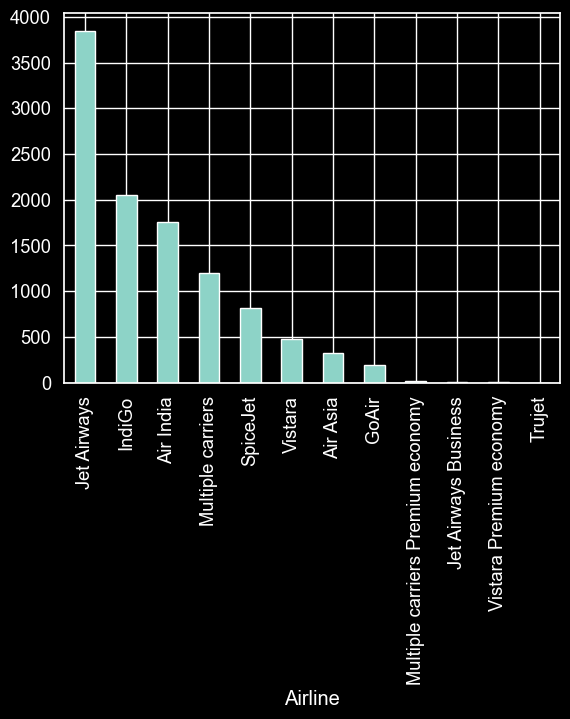

In [954]:
df.Airline.value_counts().plot(kind = 'bar',style = 'dark_background')

In [956]:
print(df['Airline'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [958]:
unwanted_airlines = [
    'Vistara Premium economy',
    'Jet Airways Business',
    'Multiple carriers Premium economy',
    'Trujet'
]

df = df[~df['Airline'].isin(unwanted_airlines)]


In [960]:
df.Airline.value_counts()

Airline
Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: count, dtype: int64

In [962]:
df.Route.value_counts()

Route
DEL → BOM → COK          2363
BLR → DEL                1550
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: count, Length: 127, dtype: int64

In [964]:
df_copy = df

### Converting Total_stops to numeric value

In [967]:
stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
    }


df_copy['Total_Stops'] = df['Total_Stops'].map(stops_mapping)

In [969]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


### Converting Duration to minutes

In [972]:
def convert_to_minutes(duration):
    hours, minutes = 0, 0  # Default values
    if 'h' in duration:
        hours = int(duration.split('h')[0])
        duration = duration.split('h')[1]  # Remove hours part

    if 'm' in duration:
        minutes = int(duration.split('m')[0])
    
    return hours * 60 + minutes
df_copy['Duration'] = df_copy['Duration'].astype(str).apply(convert_to_minutes)


# Display the first few rows
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302


### Converting Dates

In [975]:
df_copy['Date_of_Journey'] = pd.to_datetime(df_copy['Date_of_Journey']);
df_copy['Year'] = df_copy['Date_of_Journey'].dt.year
df_copy['Month'] = df_copy['Date_of_Journey'].dt.month_name()
df_copy['Day'] = df_copy['Date_of_Journey'].dt.day_name()
df_copy['Day_of_the_month'] = df_copy['Date_of_Journey'].dt.day


C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\813034633.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_copy['Date_of_Journey'] = pd.to_datetime(df_copy['Date_of_Journey']);


In [977]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Day_of_the_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,3897,2019,March,Sunday,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,7662,2019,May,Wednesday,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,13882,2019,June,Sunday,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No info,6218,2019,May,Sunday,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No info,13302,2019,March,Friday,1


In [979]:
# If 'Arrival_Time' sometimes includes date info, first separate time
df_copy['Arrival_Time'] = df_copy['Arrival_Time'].str.split(' ').str[0]

# Extract Departure Hour and Minute
df_copy['Dep_Hour'] = pd.to_datetime(df_copy['Dep_Time']).dt.hour
df_copy['Dep_Minute'] = pd.to_datetime(df_copy['Dep_Time']).dt.minute

# Extract Arrival Hour and Minute
df_copy['Arrival_Hour'] = pd.to_datetime(df_copy['Arrival_Time']).dt.hour
df_copy['Arrival_Minute'] = pd.to_datetime(df_copy['Arrival_Time']).dt.minute

C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\2594745647.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Dep_Hour'] = pd.to_datetime(df_copy['Dep_Time']).dt.hour
C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\2594745647.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Dep_Minute'] = pd.to_datetime(df_copy['Dep_Time']).dt.minute
C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\2594745647.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_copy['Arrival_Hour'] = pd.to_datetime(df_copy['Arrival_Time']).dt.hour
C:\Users\Shawn sai\App

In [981]:
# Combine Dep_Hour and Dep_Minute into Dep_Time_in_Minutes
df_copy['Dep_Time_Minutes'] = df_copy['Dep_Hour'] * 60 + df_copy['Dep_Minute']

# Combine Arrival_Hour and Arrival_Minute into Arrival_Time_in_Minutes
df_copy['Arrival_Time_Minutes'] = df_copy['Arrival_Hour'] * 60 + df_copy['Arrival_Minute']

# Drop the redundant intermediate columns
df_copy.drop(['Dep_Hour', 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute'], axis=1, inplace=True)


In [983]:
df_copy['Total_Stops'] = df_copy['Total_Stops'].astype(int)

In [985]:
df_copy.drop(['Route'], axis = 1, inplace = True)

In [987]:
df_copy.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Year', 'Month', 'Day', 'Day_of_the_month', 'Dep_Time_Minutes',
       'Arrival_Time_Minutes'],
      dtype='object')

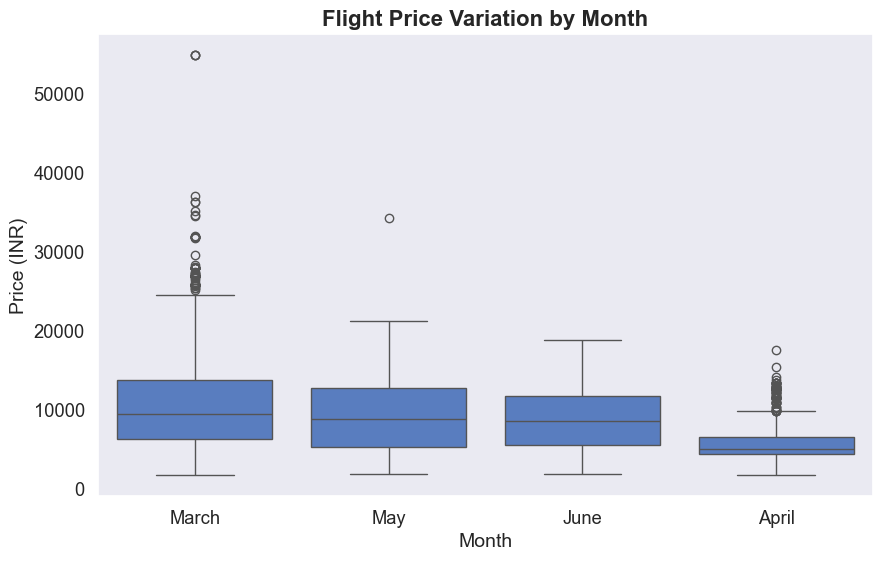

In [989]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set corporate style aesthetics
sns.set(style="dark", palette="muted", font_scale=1.2)

# Initialize the figure
plt.figure(figsize=(10, 6))

# Plot using seaborn
sns.boxplot(x='Month', y='Price', data=df_copy)

# Title and labels
plt.title('Flight Price Variation by Month', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Price (INR)', fontsize=14)

# Show the plot
plt.show()


### Categorizing day of the month

In [991]:
def categorize_day(day):
    if day <= 10:
        return 'Early'
    elif day <= 20:
        return 'Mid'
    else:
        return 'Late'

df_copy['Day_Category'] = df_copy['Day_of_the_month'].apply(categorize_day)

In [994]:
df_copy.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Year,Month,Day,Day_of_the_month,Dep_Time_Minutes,Arrival_Time_Minutes,Day_Category
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,170,0,No info,3897,2019,March,Sunday,24,1340,70,Late
1,Air India,2019-05-01,Kolkata,Banglore,05:50,13:15,445,2,No info,7662,2019,May,Wednesday,1,350,795,Early
2,Jet Airways,2019-06-09,Delhi,Cochin,09:25,04:25,1140,2,No info,13882,2019,June,Sunday,9,565,265,Early
3,IndiGo,2019-05-12,Kolkata,Banglore,18:05,23:30,325,1,No info,6218,2019,May,Sunday,12,1085,1410,Mid
4,IndiGo,2019-03-01,Banglore,New Delhi,16:50,21:35,285,1,No info,13302,2019,March,Friday,1,1010,1295,Early


### EDA

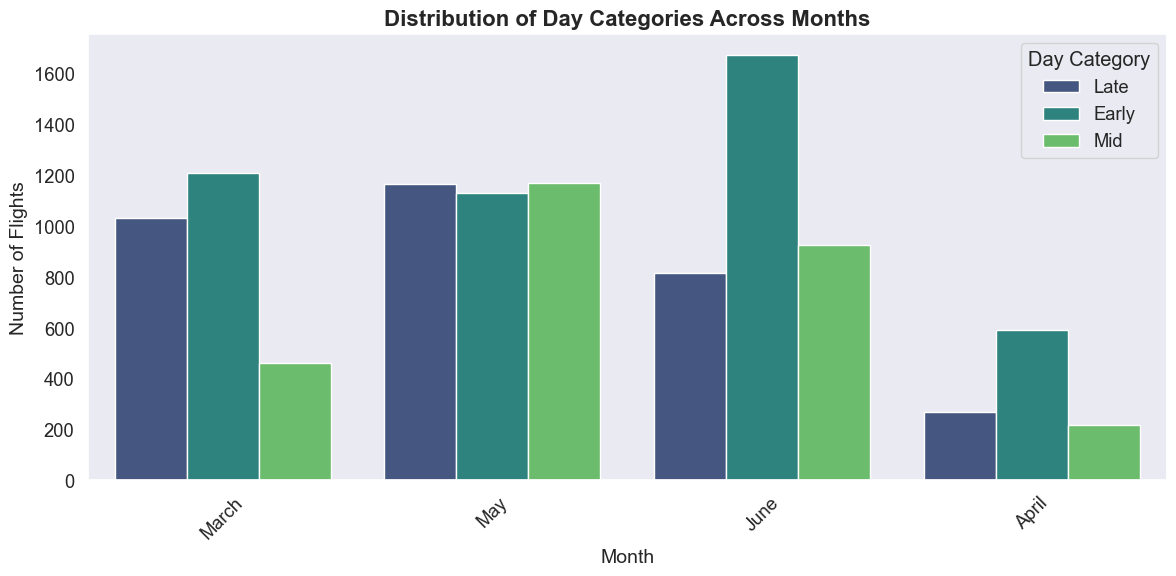

In [997]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df_copy, x='Month', hue='Day_Category', palette='viridis')

plt.title('Distribution of Day Categories Across Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.legend(title='Day Category')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\897177153.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\897177153.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


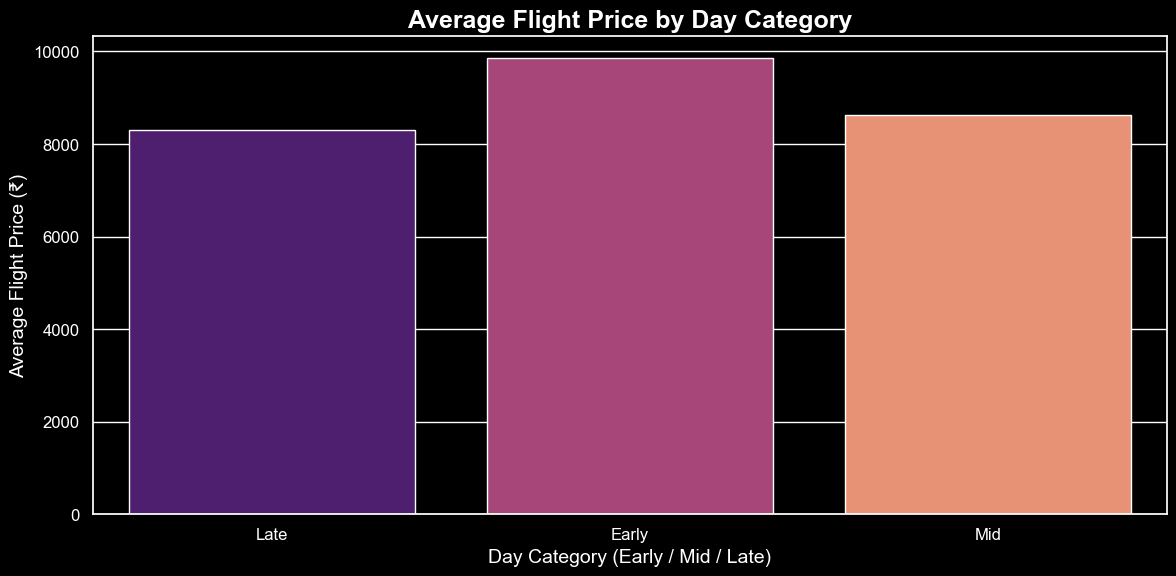

In [998]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_copy, 
    x='Day_Category', 
    y='Price', 
    palette='magma',  # High-contrast colors
    ci=None
)

plt.title('Average Flight Price by Day Category', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Day Category (Early / Mid / Late)', fontsize=14, color='white')
plt.ylabel('Average Flight Price (₹)', fontsize=14, color='white')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show();


C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\3052839865.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Shawn sai\AppData\Local\Temp\ipykernel_8612\3052839865.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


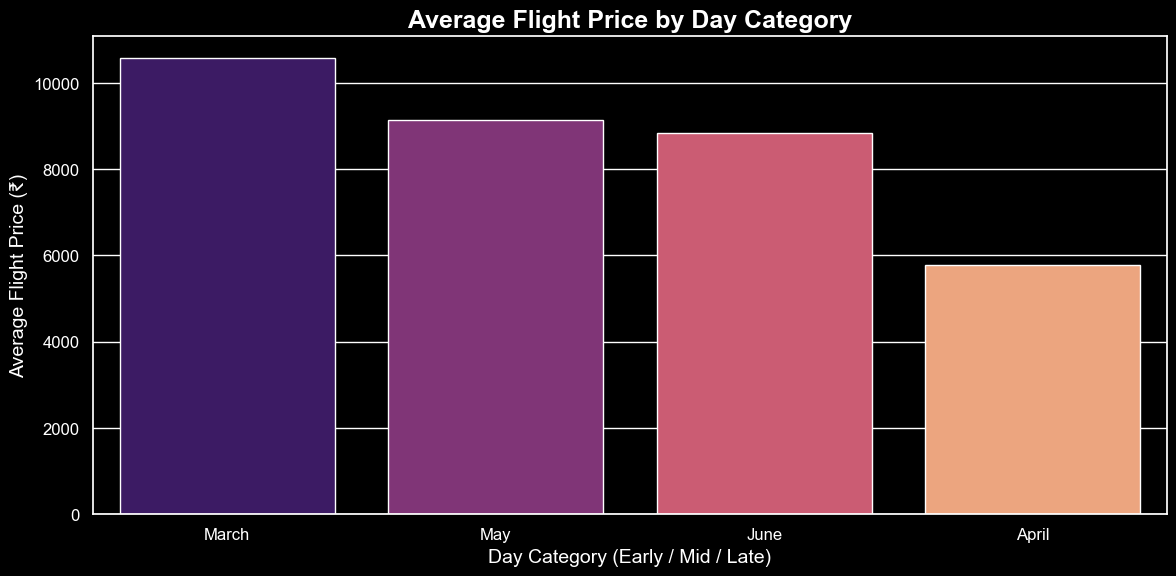

In [999]:
sns.set_style('darkgrid')
plt.style.use('dark_background')
plt.figure(figsize = (12,6))

sns.barplot(
    data = df_copy,
    x = 'Month',
    y = 'Price',
    palette='magma',  # High-contrast colors
    ci=None
)

plt.title('Average Flight Price by Day Category', fontsize=18, fontweight='bold', color='white')
plt.xlabel('Day Category (Early / Mid / Late)', fontsize=14, color='white')
plt.ylabel('Average Flight Price (₹)', fontsize=14, color='white')
plt.xticks(color='white', fontsize=12)
plt.yticks(color='white', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show();

    
    

### Dropping Columns

In [1002]:
df_copy.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price',
       'Year', 'Month', 'Day', 'Day_of_the_month', 'Dep_Time_Minutes',
       'Arrival_Time_Minutes', 'Day_Category'],
      dtype='object')

In [1004]:
df_copy.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Year','Day_of_the_month','Year'],axis = 1,inplace = True)

In [1005]:
df_copy.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Month', 'Day', 'Dep_Time_Minutes',
       'Arrival_Time_Minutes', 'Day_Category'],
      dtype='object')

In [1010]:
Columns = ['Airline','Source','Destination','Additional_Info','Day_Category','Month','Day','Day_Category']

In [1012]:
# Step 1: Selecting relevant columns
cols_to_encode = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Day_Category', 'Month', 'Day']

# Step 2: One-Hot Encoding with dtype=int
dummies = pd.get_dummies(df_copy[cols_to_encode], drop_first=True, dtype=int)

# Step 3: Concatenating
df_copy = pd.concat([df_copy, dummies], axis=1)

# Step 4: Dropping originals
df_copy.drop(cols_to_encode, axis=1, inplace=True)


In [1014]:
df_copy.head()

,Duration,Total_Stops,Price,Dep_Time_Minutes,Arrival_Time_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,...,Day_Category_Mid,Month_June,Month_March,Month_May,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,170,0,3897,1340,70,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,445,2,7662,350,795,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1140,2,13882,565,265,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,325,1,6218,1085,1410,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
4,285,1,13302,1010,1295,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Feature Scaling

In [1017]:
from sklearn.preprocessing import StandardScaler

# Apply only to numeric columns (not one-hot encoded categorical)
num_cols = ['Duration', 'Total_Stops', 'Dep_Time_Minutes','Arrival_Time_Minutes']
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])


### Model

In [1020]:
from sklearn.model_selection import train_test_split,cross_val_score

X = df_copy.drop(['Price'],axis = 1)
y = df_copy['Price']

X_train,X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.2,train_size = 0.8, random_state=42)

In [1022]:
%%time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.01),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

CPU times: total: 0 ns
Wall time: 1.25 ms


In [1024]:
%%time
# Dictionary to store trained models
trained_models = {}

# Loop to train
for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model


CPU times: total: 13.5 s
Wall time: 8.75 s


In [1025]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

def evaluate_models(models, X_test, y_test):
    evaluation_report = {}

    for name, model in models.items():
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)

        evaluation_report[name] = {
            'R2 Score': round(r2, 4),
            'RMSE': round(rmse, 2),
            'MAE': round(mae, 2)
        }
    
    return evaluation_report


In [1028]:
evaluation_results = evaluate_models(trained_models, X_test, y_test)
df_evaluation = pd.DataFrame(evaluation_results).T 
print(df_evaluation)

                   R2 Score     RMSE      MAE
Linear Regression    0.6902  2484.39  1711.12
Ridge Regression     0.6901  2484.71  1712.73
Lasso Regression     0.6902  2484.36  1711.10
Random Forest        0.8596  1672.28   732.49
Gradient Boosting    0.7789  2098.71  1284.83
XGBoost              0.8442  1761.71   947.67


### tuning hyperpapameters of the Best Model (RandomForest)

In [1031]:
new_model = RandomForestRegressor(n_jobs = -1, random_state = 42)
new_model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [1033]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid (removed None from max_samples)
rf_grid = {
    "n_estimators": np.arange(10, 101, 10),
    "max_depth": [3, 5, 10],
    "min_samples_split": np.arange(2, 21, 2),
    "min_samples_leaf": np.arange(1, 21, 2),
    "max_features": [0.5, 0.8, 1.0, "sqrt", "log2"],  # ✅ fixed here
    "max_samples": [0.5, 0.8]  # Optional
}

# Initialize model
base_model = RandomForestRegressor(
    n_jobs=-1,
    random_state=42,
    bootstrap=True  # max_samples works only when bootstrap is True
)

# Set up RandomizedSearchCV
rs_model = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=rf_grid,
    n_iter=10,  # Increase this for a more thorough search
    cv=5,
    verbose=2,
    random_state=42,
    error_score='raise'
)

# Fit model
rs_model.fit(X_train, y_train)

# Best parameters
print("Best parameters:", rs_model.best_params_)
print("Best score (R² on CV):", rs_model.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.3s
[CV] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=10, max_features=0.8, max_samples=0.8, min_samples_leaf=13, min_samples_split=12, n_estimators=50; total time=   0.2s
[CV] END max_depth=5, max_features=1.0, max_samples=0.8, min_samples_leaf=15, min_samples_split=20, n_estimators=60; total time=   0.2s
[CV] END max_depth=5, max_features=1.0, max_samples=0.8, min_samples_leaf=15, min_samples_split=20, n_estimators=60; t

In [1035]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_samples': 0.5,
 'max_features': 0.8,
 'max_depth': 10}

In [1053]:
%%time

# ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) 
ideal_model.fit(X_train, y_train)

CPU times: total: 1.33 s
Wall time: 299 ms


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [1039]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"R² Score : {r2:.4f}")
    print(f"RMSE     : {rmse:.2f}")
    print(f"MAE      : {mae:.2f}")

    return {"R2 Score": r2, "RMSE": rmse, "MAE": mae}


In [1055]:
y_pred = ideal_model.predict(X_test)
results = evaluate_model(y_test, y_pred)


R² Score : 0.8232
RMSE     : 1876.90
MAE      : 982.14


In [1043]:
ideal_model.feature_importances_

array([3.86278982e-01, 1.00278047e-01, 2.64756222e-02, 3.13348220e-02,
       8.29943300e-03, 2.99547876e-03, 3.07730265e-02, 9.64309240e-02,
       1.73082907e-02, 1.28841728e-02, 2.48883784e-03, 7.49215019e-04,
       6.82743167e-03, 4.97485055e-03, 4.23417711e-03, 1.12528036e-02,
       2.91473421e-03, 3.33427484e-03, 5.62938763e-04, 2.48892567e-02,
       0.00000000e+00, 7.90246867e-04, 0.00000000e+00, 8.51843063e-05,
       5.41176826e-02, 0.00000000e+00, 4.63136216e-04, 3.16627455e-02,
       2.33499604e-05, 3.42436306e-02, 1.62276310e-02, 6.32519153e-03,
       3.32669029e-02, 8.43502522e-03, 5.02799524e-03, 4.32720746e-03,
       4.97637654e-03, 6.12465581e-03, 3.28727120e-03, 1.53284481e-02])

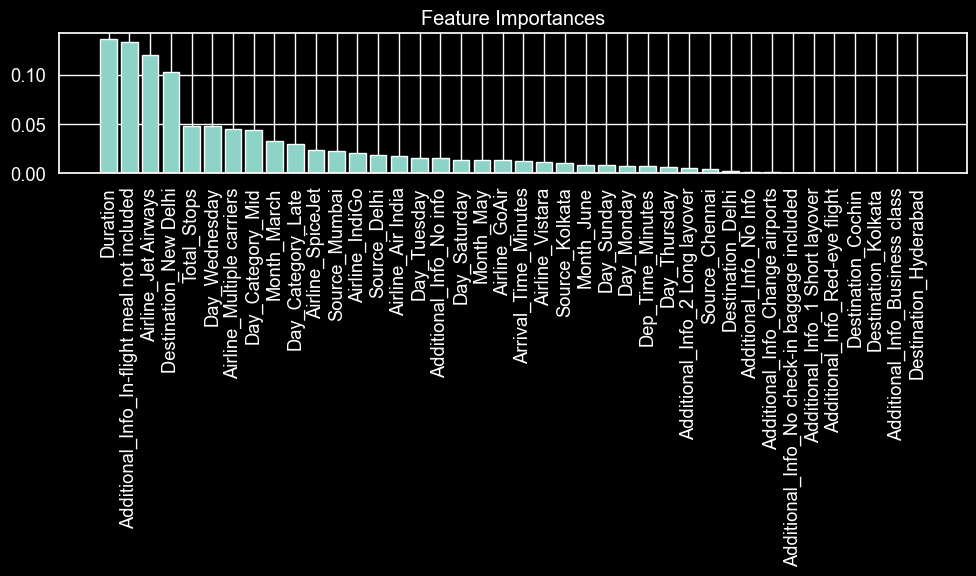

In [1049]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()
